In [4]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
#MID ADD
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# For reproducibility
np.random.seed(1000)

nb_samples = 1000

path='C:\\Users\\Mark\\Documents\\CS - Code\\GitHub-20190615T150318Z-001\\'
#path='C:\\users\\thede\\Documents\\CS-code\\github\\'
file='final wb.csv'

In [7]:
with open(path+file,'rt')as f:
#with open('C:\\users\\thede\\Documents\\CS-code\\github\\final wb.csv','rt')as f:
    datas = csv.reader(f)
    #reader = csv.DictReader(open("C:\\users\\thede\\Documents\\CS-code\\github\\final wb.csv"))
    #for row in reader:
    #    print(row)
    for row in datas:
        print(row)   

['ID', 'xloc', 'yloc', 'Mobility', 'BV', 'lbs-ft', 'EUR-ft']
['-7', '-873', '14736', '', '', '389', '48']
['-7', '-873', '14736', '', '', '504', '']
['0', '3364', '5641', '', '51044.73', '251', '59']
['1', '3453', '7876', '20', '51051.7', '317', '56']
['2', '31136', '8032', '8', '53792.48', '498', '76']
['3', '31136', '8032', '9', '26786.69', '497', '13']
['8', '11547', '6965', '', '110607.69', '470', '63']
['12', '31441', '3878', '3', '', '465', '26']
['15', '12258', '19567', '10', '84953.69', '392', '39']
['18', '122', '29865', '14', '', '490', '75']
['19', '-72', '28303', '11', '116035.34', '502', '50']
['20', '-2639', '28712', '10', '126925.16', '443', '55']
['21', '-3772', '27982', '15', '', '257', '43']
['22', '-4596', '27235', '6', '', '38', '42']
['23', '', '', '4', '', '', '43']
['24', '6945', '13500', '11', '', '459', '59']
['25', '2056', '13316', '8', '96053.42', '452', '48']
['26', '6028', '10001', '14', '80329.11', '521', '69']
['27', '12459', '24798', '11', '82306.64', '5

In [21]:

result = pd.read_csv(path+file)
print(result[:64])

#Note zeros in locations should be set to null
print(result.iloc[21,4])
print(result.iloc[22,4])
result.iloc[21,4]=float('NaN')
result.iloc[22,4]=float('NaN')
print(result.iloc[21,4])
print(result.iloc[22,4])



       ID     xloc     yloc  Mobility         BV  lbs-ft  EUR-ft
0    -7.0   -873.0  14736.0       NaN        NaN   389.0    48.0
1    -7.0   -873.0  14736.0       NaN        NaN   504.0     NaN
2     0.0   3364.0   5641.0       NaN   51044.73   251.0    59.0
3     1.0   3453.0   7876.0      20.0   51051.70   317.0    56.0
4     2.0  31136.0   8032.0       8.0   53792.48   498.0    76.0
5     3.0  31136.0   8032.0       9.0   26786.69   497.0    13.0
6     8.0  11547.0   6965.0       NaN  110607.69   470.0    63.0
7    12.0  31441.0   3878.0       3.0        NaN   465.0    26.0
8    15.0  12258.0  19567.0      10.0   84953.69   392.0    39.0
9    18.0    122.0  29865.0      14.0        NaN   490.0    75.0
10   19.0    -72.0  28303.0      11.0  116035.34   502.0    50.0
11   20.0  -2639.0  28712.0      10.0  126925.16   443.0    55.0
12   21.0  -3772.0  27982.0      15.0        NaN   257.0    43.0
13   22.0  -4596.0  27235.0       6.0        NaN    38.0    42.0
14   23.0      NaN      N

In [23]:
import statsmodels.api as sm

#df = pd.DataFrame(data.data, columns=data.feature_names)
target = result["EUR-ft"][:64]
y = target
print(target)
X = result[["xloc","yloc","BV","lbs-ft"]][:64]
#X = result["yloc"][:64]
print(X)



0      48.0
1       NaN
2      59.0
3      56.0
4      76.0
5      13.0
6      63.0
7      26.0
8      39.0
9      75.0
10     50.0
11     55.0
12     43.0
13     42.0
14     43.0
15     59.0
16     48.0
17     69.0
18     47.0
19     47.0
20     51.0
21     67.0
22     80.0
23     33.0
24     51.0
25     49.0
26     41.0
27     44.0
28     39.0
29     52.0
      ...  
34    135.0
35     12.0
36      NaN
37    118.0
38    109.0
39     83.0
40     78.0
41     97.0
42     37.0
43     38.0
44     64.0
45    107.0
46     84.0
47     40.0
48     27.0
49    111.0
50     47.0
51     69.0
52     46.0
53     41.0
54     27.0
55     57.0
56    200.0
57     43.0
58     37.0
59     50.0
60     40.0
61     41.0
62      NaN
63     39.0
Name: EUR-ft, Length: 64, dtype: float64
       xloc     yloc         BV  lbs-ft
0    -873.0  14736.0        NaN   389.0
1    -873.0  14736.0        NaN   504.0
2    3364.0   5641.0   51044.73   251.0
3    3453.0   7876.0   51051.70   317.0
4   31136.0   8032.0   5379

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     34.00
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.39e-09
Time:                        11:14:07   Log-Likelihood:                -125.02
No. Observations:                  27   AIC:                             258.0
Df Residuals:                      23   BIC:                             263.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
xloc          -0.0005      0.001     -0.733      0.471      -0.002       0.001
yloc          -0.0021      0.001     -2.597      0.016      -0.004      -0.000
BV           4.44e-05      0.000      0.304      0.764      -0.000       0.000
lbs-ft         0.1918      0.034      5.585      0.000       0.121       0.263
==============================================================================
Omnibus:                        0.884   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.473
Skew:                           0.324   Prob(JB):                        0.789
Kurtosis:                       2.964   Cond. No.                         656.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

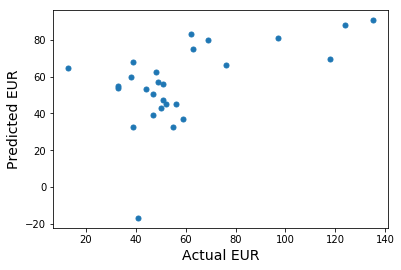

In [24]:
model = sm.OLS(y, X,missing='drop').fit()
predictions = model.predict(X) # make the predictions by the model
plt.plot(y,predictions, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
model.summary()

[[ 48.                  nan]
 [         nan          nan]
 [ 59.          35.75772792]
 [ 56.          42.75875092]
 [ 76.          74.21468473]
 [ 13.          72.2655267 ]
 [ 63.          75.21845914]
 [ 26.                  nan]
 [ 39.          34.4390762 ]
 [ 75.                  nan]
 [ 50.          38.01751813]
 [ 55.          27.60847121]
 [ 43.                  nan]
 [ 42.                  nan]
 [ 43.                  nan]
 [ 59.                  nan]
 [ 48.          58.27945275]
 [ 69.          75.99175802]
 [ 47.          49.86928424]
 [ 47.          39.43757753]
 [ 51.          47.27397857]
 [ 67.                  nan]
 [ 80.                  nan]
 [ 33.          54.97530486]
 [ 51.          57.98496855]
 [ 49.          58.92359189]
 [ 41.         -10.12873743]
 [ 44.          53.18099933]
 [ 39.          66.18090374]
 [ 52.          44.67730582]
 [ 33.          53.84040908]
 [ 62.          80.98361673]
 [ 97.          78.03015467]
 [124.          84.50202377]
 [135.        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     46.04
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           4.15e-10
Time:                        11:14:23   Log-Likelihood:                -125.33
No. Observations:                  27   AIC:                             256.7
Df Residuals:                      24   BIC:                             260.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yloc          -0.0020      0.001     -2.575      0.017      -0.004      -0.000
BV          6.571e-05      0.000      0.464      0.647      -0.000       0.000
lbs-ft         0.1745      0.025      7.045      0.000       0.123       0.226
==============================================================================
Omnibus:                        0.294   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.006
Skew:                           0.036   Prob(JB):                        0.997
Kurtosis:                       2.999   Cond. No.                         476.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

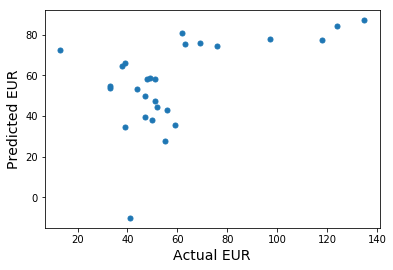

In [25]:
X2 = result[["yloc","BV","lbs-ft"]][:64]
model2 = sm.OLS(y, X2,missing='drop').fit()
predictions2 = model2.predict(X2) # make the predictions by the model
plt.plot(y,predictions2, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
print(np.c_[y,predictions2])
model2.summary()

yloc       15905.0
BV        128062.2
lbs-ft        78.0
Name: 26, dtype: float64
ID              39.0
xloc          9798.0
yloc         15905.0
Mobility         NaN
BV          128062.2
lbs-ft          78.0
EUR-ft          41.0
Name: 26, dtype: float64
[[ 48.                  nan]
 [         nan          nan]
 [ 59.          35.20964057]
 [ 56.          43.69190122]
 [ 76.          79.23641342]
 [ 13.          80.62729063]
 [ 63.          72.54026366]
 [ 26.                  nan]
 [ 39.          32.27277813]
 [ 75.                  nan]
 [ 50.          34.14243535]
 [ 55.          20.90447785]
 [ 43.                  nan]
 [ 42.                  nan]
 [ 43.                  nan]
 [ 59.                  nan]
 [ 48.          56.58443198]
 [ 69.          78.151047  ]
 [ 47.          51.39192947]
 [ 47.          40.12156068]
 [ 51.          49.71495643]
 [ 67.                  nan]
 [ 80.                  nan]
 [ 33.          49.35219481]
 [ 51.          50.08994933]
 [ 49.          47.67

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     56.03
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           9.93e-11
Time:                        11:14:55   Log-Likelihood:                -118.30
No. Observations:                  26   AIC:                             242.6
Df Residuals:                      23   BIC:                             246.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yloc          -0.0021      0.001     -2.899      0.008      -0.004      -0.001
BV         -5.887e-05      0.000     -0.422      0.677      -0.000       0.000
lbs-ft         0.1991      0.025      8.004      0.000       0.148       0.251
==============================================================================
Omnibus:                        5.504   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                3.616
Skew:                          -0.688   Prob(JB):                        0.164
Kurtosis:                       4.201   Cond. No.                         506.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

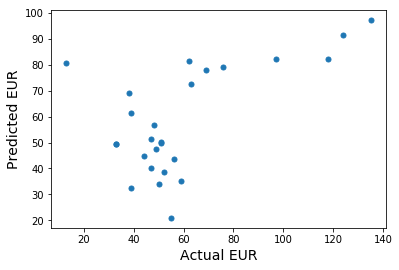

In [26]:
#Exclude ID 39 from previous plot, visible outlier (Row 26)
print(X2.iloc[26,:])
print(result.iloc[26,:])
X2.iloc[26,0]=float('NaN')
X2.iloc[26,1]=float('NaN')
X2.iloc[26,2]=float('NaN')

model2_ol = sm.OLS(y, X2,missing='drop').fit()
predictions2_ol = model2_ol.predict(X2) # make the predictions by the model
plt.plot(y,predictions2_ol, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
print(np.c_[y,predictions2_ol])
model2_ol.summary()

In [47]:
# interpreting coefficients:
# meaning of lbs-ft coefficient.
# For every 100 increase in lbs-ft, EUR/ft expected increase by
# 0.1991*100=19.9
# For every 1000' in coordinate southward, EUR/ft decrease by 
# 0.0021*1000=2.1
print("Average lbs/ft",np.mean(X2["lbs-ft"]))
print("Average result (EUR)",np.mean(y))
print("for every ",(100/np.mean(X2["lbs-ft"])),"relative to the mean increase in lbs/ft,",(19.9/np.mean(y))," relative to the mean increase in result")
print("for every 1000 ft increase in southern distance/location, ",1000*0.0021," decrease in result ")

Average lbs/ft 404.7090909090909
Average result (EUR) 59.967213114754095
for every  0.24709106428860236 relative to the mean increase in lbs/ft, 0.3318480043739748  relative to the mean increase in result
for every 1000 ft increase in southern distance/location,  2.1  decrease in result 



[[ 48.                  nan]
 [         nan          nan]
 [ 59.           2.22317487]
 [ 56.           2.72235506]
 [ 76.           4.329372  ]
 [ 13.           4.20599157]
 [ 63.           4.36307398]
 [ 26.                  nan]
 [ 39.           3.08633465]
 [ 75.                  nan]
 [ 50.           3.86005293]
 [ 55.           3.36875444]
 [ 43.                  nan]
 [ 42.                  nan]
 [ 43.                  nan]
 [ 59.                  nan]
 [ 48.           3.90127002]
 [ 69.           4.57073173]
 [ 47.           4.20379837]
 [ 47.           3.57428597]
 [ 51.           3.79972144]
 [ 67.                  nan]
 [ 80.                  nan]
 [ 33.           4.06297525]
 [ 51.           4.10321611]
 [ 49.           4.14685801]
 [ 41.                  nan]
 [ 44.           3.89614841]
 [ 39.           4.42153234]
 [ 52.           3.29522237]
 [ 33.           3.53069525]
 [ 62.           4.5161033 ]
 [ 97.           4.24813867]
 [124.           4.46272933]
 [135.       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     256.7
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           8.11e-18
Time:                        11:21:25   Log-Likelihood:                -26.968
No. Observations:                  26   AIC:                             59.94
Df Residuals:                      23   BIC:                             63.71
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yloc       -3.792e-05   2.14e-05     -1.770      0.090   -8.22e-05     6.4e-06
BV          4.241e-06   4.16e-06      1.018      0.319   -4.37e-06    1.29e-05
lbs-ft         0.0088      0.001     11.930      0.000       0.007       0.010
==============================================================================
Omnibus:                        3.070   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                1.641
Skew:                           0.248   Prob(JB):                        0.440
Kurtosis:                       4.126   Cond. No.                         506.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

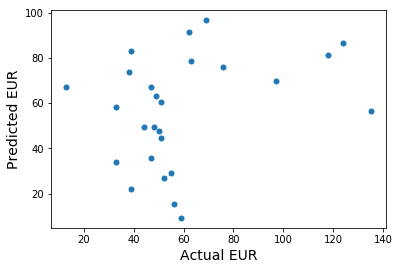

In [60]:
#Log y model
model2_ol = sm.OLS(np.log(y), X2,missing='drop').fit()
predictions2_ol = model2_ol.predict(X2) # make the predictions by the model
print()

plt.plot(y,np.power(np.e,predictions2_ol), linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
print(np.c_[y,predictions2_ol])
model2_ol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EUR-ft   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     75.17
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           4.55e-16
Time:                        11:15:32   Log-Likelihood:                -265.40
No. Observations:                  54   AIC:                             534.8
Df Residuals:                      52   BIC:                             538.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yloc           0.0002      0.000      0.478      0.635      -0.001       0.001
lbs-ft         0.1300      0.014      9.107      0.000       0.101       0.159
==============================================================================
Omnibus:                        2.772   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.510
Skew:                           0.440   Prob(JB):                        0.285
Kurtosis:                       2.416   Cond. No.                         50.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

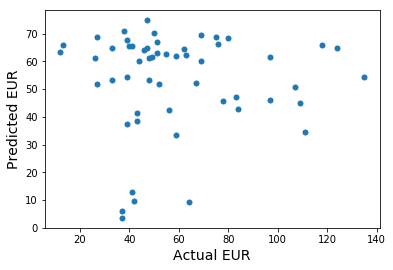

In [27]:
X3 = result[["yloc","lbs-ft"]][:64]
model3 = sm.OLS(y, X3,missing='drop').fit()
predictions3 = model3.predict(X3) # make the predictions by the model
plt.plot(y,predictions3, linestyle='None',marker='.',markersize=10)
plt.xlabel("Actual EUR",fontsize=14)
plt.ylabel("Predicted EUR",fontsize=14)
# Print out the statistics
model3.summary()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)